# Estudo sobre agrupamento nos dados o Cartola FC. 
**Disciplina: Machine Learning.**


**Integrantes**:


*   Lourdes Milagros Mendoza Villavicencio
*   Bruno Vicente Alves de Lima

**Atividade**

- considerar as características dos jogadores disponibilizadas pelo projeto caRtola. Caso o grupo ache necessário, poderá focar em apenas uma posição (goleiro, zagueiro, atacante, etc) .

- documentar todo o notebook, incluindo o arquivo README.md (identificação do grupo e explicação do trabalho)

 

**Descrição das Variaveis**


| coluna          | descrição                                                 | observações                                                                                        |
|-----------------|-----------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| Rodada          | número da rodada do Brasileirão                           |                                                                                                    |
| ClubeID         | clube do jogador                                          | ver arquivo times_ids.csv                                                                          |
| AtletaID        | id do jogador                                             |                                                                                                    |
| Participou      | indica se o jogador participou daquela rodada             | FALSE:Não, TRUE:Sim                                                                                |
| Posicao         | posição do jogador                                        | gol:goleiro, zag:zagueiro, lat:lateral, mei:meia, ata:atacante, tec:técnico                        |
| Jogos           | qtde. de jogos que o jogador participou até aquela rodada |                                                                                                    |
| Pontos          | pontuação do jogador                                      |                                                                                                    |
| PontosMedia     | média da pontuação do jogador                             |                                                                                                    |
| Preco           | preço do jogador                                          |                                                                                                    |
| PrecoVariacao   | variação de preço                                         |                                                                                                    |
| FS              | faltas sofridas                                           |                                                                                                    |
| PE              | passes errados                                            |                                                                                                    |
| A               | assistências                                              |                                                                                                    |
| FT              | finalizações na trave                                     |                                                                                                    |
| FD              | finalizações defendidas                                   |                                                                                                    |
| FF              | finalizações para fora                                    |                                                                                                    |
| G               | gols                                                      |                                                                                                    |
| I               | impedimentos                                              |                                                                                                    |
| PP              | pênaltis perdidos                                         |                                                                                                    |
| RB              | roubadas de bola                                          |                                                                                                    |
| FC              | faltas cometidas                                          |                                                                                                    |
| GC              | gols contra                                               |                                                                                                    |
| CA              | cartões amarelo                                           |                                                                                                    |
| CV              | cartões vermelho                                          |                                                                                                    |
| SG              | jogos sem sofrer gols                                     |                                                                                                    |
| DD              | defesas difíceis                                          |                                                                                                    |
| DP              | defesas de pênalti                                        |                                                                                                    |
| GS              | gols sofridos                                             |                                                                                                    |
| ano             | ano dos dados                                             |                                                                                                    |
| Apelido         | nome/apelido do jogador                                   |                                                                                                    |
| Status          | status do jogador                                         | Provável, Dúvida, Suspenso, Nulo, ...                                                              |
| risk_points     | desvio-padrão da pontuação do jogador                     |                                                                                                    |
| mes             | mês que a partida ocorreu                                 |                                                                                                    |
| dia             | dia que a partida ocorreu                                 |                                                                                                    |
| away.score.x    | placar to time visitante                                  |                                                                                                    |
| home.score.x    | placar do time da casa                                    |                                                                                                    |
| home.attack     | estimativa de força de ataque do time do jogador          | estimada a partir de uma regressão de Poisson com base no histórico de confrontos entre os times   |
| home.defend     | estimativa de força de defesa do time do jogador          | estimada a partir de uma regressão de Poisson com base no histórico de confrontos entre os times   |
| pred.home.score | estimativa de gols para o time da casa                    | estimada a partir de 10000 simulações  de confronto entre os times usando distribuições de Poisson |
| pred.away.score | estimativa de gols para o time visitante                  | estimada a partir de 10000 simulações,de confronto entre os times usando distribuições de Poisson  |
| variable        | indica se o jogador é do time da casa ou visitante        | home.team: casa, away.team: visitante                                                              |




# New Section

In [7]:
import pandas as pd

dados = pd.read_csv('dados_agregados_limpos.csv')
dados.head(10)


,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,...,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
0,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,...,0.0,19.0,0.0,0.0,1.0,4.0,0.0,0.0,1.000000,home.team
1,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,2.0,1.0,...,2.0,27.0,0.0,0.0,2.0,4.0,0.0,0.0,1.000000,away.team
2,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,...,1.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,1.000000,home.team
3,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,1.0,...,1.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.000000,home.team
4,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,5.0,0.0,...,0.0,18.0,0.0,0.0,0.0,5.0,0.0,0.0,1.000000,away.team
5,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,0.0,...,3.0,25.0,0.0,0.0,1.0,5.0,0.0,0.0,1.000000,home.team
6,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,1.0,0.0,...,0.0,28.0,0.0,0.0,2.0,5.0,0.0,0.0,1.000000,home.team
7,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,3.226298,away.team
8,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,0.0,...,1.0,17.0,0.0,0.0,2.0,7.0,0.0,0.0,3.195153,away.team
9,1.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,4.0,7.0,0.0,0.0,3.971580,home.team


In [61]:
#"Dimensões originais dos dados: "
print(dados.shape)

(17567, 77)


In [62]:
dados.columns

Index(['A', 'Apelido', 'AtletaID', 'CA', 'CV', 'ClubeID', 'DD', 'DP', 'FC',
       'FD', 'FF', 'FS', 'FT', 'G', 'GC', 'GS', 'I', 'Jogos', 'PE', 'PP',
       'Participou', 'Pontos', 'PontosMedia', 'Posicao', 'Preco',
       'PrecoVariacao', 'RB', 'Rodada', 'SG', 'Status', 'ano', 'avg.A',
       'avg.A.l05', 'avg.CA', 'avg.CV.l05', 'avg.DD', 'avg.DD.l05', 'avg.DP',
       'avg.DP.l05', 'avg.FC', 'avg.FC.l05', 'avg.FD', 'avg.FD.l05', 'avg.FF',
       'avg.FF.l05', 'avg.FS', 'avg.FS.l05', 'avg.FT', 'avg.FT.l05', 'avg.G',
       'avg.G.l05', 'avg.GC', 'avg.GC.l05', 'avg.GS', 'avg.GS.l05', 'avg.I',
       'avg.I.l05', 'avg.PE', 'avg.PE.l05', 'avg.PP', 'avg.PP.l05',
       'avg.Points', 'avg.RB', 'avg.RB.l05', 'avg.SG', 'avg.SG.l05',
       'avg.last05', 'away.score.x', 'dia', 'home.attack', 'home.defend',
       'home.score.x', 'mes', 'pred.away.score', 'pred.home.score',
       'risk_points', 'variable'],
      dtype='object')

In [0]:

print(dados['Posicao'].value_counts())



In [69]:
import pandas as pd
import numpy as np
data= dados [['Posicao', 'PontosMedia','Preco']]
data.head()


,Posicao,PontosMedia,Preco
0,zag,2.00,12.88
1,zag,2.70,12.04
2,zag,1.83,10.85
3,zag,1.60,10.61
4,zag,1.52,10.45


In [70]:
data=data.loc[data['Posicao']== 'zag']
data.head( )

,Posicao,PontosMedia,Preco
0,zag,2.00,12.88
1,zag,2.70,12.04
2,zag,1.83,10.85
3,zag,1.60,10.61
4,zag,1.52,10.45


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [0]:
X=data.iloc[:,1:3]
X

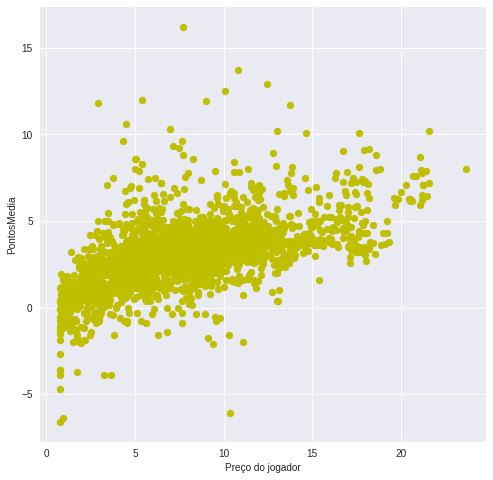

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.scatter(data['Preco'], data['PontosMedia'], c='y')
plt.xlabel('Preço do jogador', fontsize=10)
plt.ylabel('PontosMedia', fontsize=10)
plt.show()

In [74]:
from sklearn.cluster import KMeans
Kmeans= KMeans(n_clusters =4)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
centroides= Kmeans.cluster_centers_
centroides

array([[ 3.28188259,  7.04259109],
       [ 1.36563528,  3.12503737],
       [ 5.27591928, 16.54529148],
       [ 3.73073529, 10.67910428]])

In [76]:
distance = Kmeans.fit_transform(X)
distance

array([[ 5.97650113,  9.77556722,  4.91589349,  2.79989047],
       [ 5.03117115,  9.01427135,  5.18970245,  1.70717674],
       [ 4.07484057,  7.73890704,  6.65662863,  1.90840247],
       ...,
       [ 4.14298927,  4.08162438, 13.04620139,  7.37746832],
       [ 4.93506996,  4.35921768, 12.32212854,  6.8861113 ],
       [ 2.44235023,  2.60012053, 12.06669267,  6.07348874]])

In [77]:
labels = Kmeans.labels_
labels

array([3, 3, 3, ..., 1, 1, 0], dtype=int32)

1 52472.0402313166
2 24213.436705990098
3 14442.152347682973
4 10650.107031052648
5 8757.341249939765
6 7571.334946058209
7 6700.307689284942
8 6024.959193898434
9 5403.770048194792
10 4925.042253664837


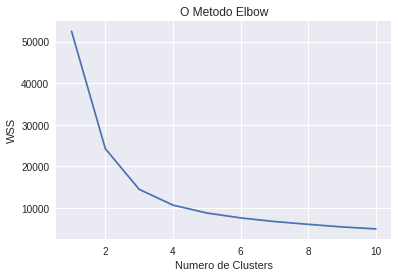

In [78]:
from sklearn.cluster import KMeans
wcss = [ ]
 
for i in range(1, 11):
    Kmeans = KMeans(n_clusters = i, init = 'random')
    Kmeans.fit(X)
    print (i, Kmeans.inertia_ )
    wcss. append(Kmeans.inertia_ )  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [79]:
from sklearn.cluster import KMeans
Kmeans= KMeans(n_clusters =3)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
centroides2= Kmeans.cluster_centers_
centroides2

array([[ 3.52584253,  8.99145695],
       [ 1.87244792,  3.86260417],
       [ 4.96459547, 15.53012945]])

In [81]:
distance2 = Kmeans.fit_transform(X)
distance2

array([[ 4.26218628,  9.0512715 ,  3.73407996],
       [ 3.24961223,  8.25344662,  3.86876151],
       [ 2.57435523,  7.02016205,  5.3426431 ],
       ...,
       [ 5.72556486,  3.58980399, 11.72085633],
       [ 5.71042662,  4.25915096, 11.02331353],
       [ 4.28022394,  1.82025776, 10.69413317]])

In [82]:
labels2 = Kmeans.labels_
labels2

array([2, 0, 0, ..., 1, 1, 1], dtype=int32)

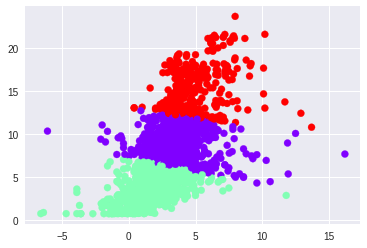

In [83]:
plt.scatter( X['PontosMedia'], X['Preco'], c=Kmeans.labels_ , cmap = 'rainbow') 

